<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodesExample/SARIMAXDiagnostics_financialTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

In [0]:
# download kaggle economic data
#https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [3]:
!pip install kaggle


In [6]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [11]:
cd gdrive/My\ Drive/


/content/gdrive/My Drive


In [12]:
ls kaggle.json


kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [15]:
os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '18', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [16]:
#check that it worked by listing the kaggle datasets
!kaggle datasets 


usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: too few arguments


In [17]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs



price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
!ls

 00101.mov
 00102.mov
 00103.mov
 00104.mov
 11bov.pdf
'11fe summary.gdoc'
 11img-179017.png
'1 2017 Proposal Award Information Form & Guidelines.pdf'
 2003VS2.png
 2013Jul15_obslog_0327.log
 2018-07-17_SC.pdf
'2018 Capstone assignments FINAL.XLSX'
'2018 Capstone assignments - worksheets.xlsx'
'2018 Capstone assignments - worksheets.xlsx.gsheet'
'2 2017 Final Report and Financial Attestation Forms.pdf'
'3 2017 Financial Report Template.xlsx'
'4 Form W-9.pdf'
 5.25.pdf
 8:00.gdoc
 A1DBA84B-27E0-4B23-A409-135AA52FB3FD.png
'AAS12948 referee report.gdoc'
'aas 2011 austin costs.gsheet'
'AAS2020 LSST Science Collaborations .gslides'
'AAS check list.gsheet'
'AAS - EDU cheatsheet.pdf'
'aas membership.gsheet'
'AAS Poster Quaoar.jpg'
 abdulqaATudel.edu.png
'Abundance_Maryam_29_Aug13 (1).pro.gdoc'
 Abundance_Maryam_29_Aug13.pro
 Abundance_Maryam_29_Aug13.pro.gdoc
'Academic Review committee POTU.gdoc'
'A  Cadence  to  Reduce  Aliasing  in  LSST Bell.gdoc'
'Accelnet 2020 notes.gdoc'
'AC NSF ID -000

In [19]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Stocks/optn.us.txt  
  inflating: Data/Stocks/optt.us.txt  
  inflating: Data/Stocks/opy.us.txt  
  inflating: Data/Stocks/or.us.txt   
  inflating: Data/Stocks/ora.us.txt  
  inflating: Data/Stocks/oran.us.txt  
  inflating: Data/Stocks/orbc.us.txt  
  inflating: Data/Stocks/orbk.us.txt  
  inflating: Data/Stocks/orc.us.txt  
  inflating: Data/Stocks/orcl.us.txt  
  inflating: Data/Stocks/orex.us.txt  
  inflating: Data/Stocks/org.us.txt  
  inflating: Data/Stocks/ori.us.txt  
  inflating: Data/Stocks/orig.us.txt  
  inflating: Data/Stocks/orit.us.txt  
  inflating: Data/Stocks/orly.us.txt  
  inflating: Data/Stocks/orm.us.txt  
  inflating: Data/Stocks/ormp.us.txt  
  inflating: Data/Stocks/orn.us.txt  
  inflating: Data/Stocks/orpn.us.txt  
  inflating: Data/Stocks/orrf.us.txt  
  inflating: Data/Stocks/osb.us.txt  
  inflating: Data/Stocks/osbc.us.txt  
  inflating: Data/Stocks/osbcp.us.txt  
  inflating: Data/Sto

In [21]:
!ls


 00101.mov
 00102.mov
 00103.mov
 00104.mov
 11bov.pdf
'11fe summary.gdoc'
 11img-179017.png
'1 2017 Proposal Award Information Form & Guidelines.pdf'
 2003VS2.png
 2013Jul15_obslog_0327.log
 2018-07-17_SC.pdf
'2018 Capstone assignments FINAL.XLSX'
'2018 Capstone assignments - worksheets.xlsx'
'2018 Capstone assignments - worksheets.xlsx.gsheet'
'2 2017 Final Report and Financial Attestation Forms.pdf'
'3 2017 Financial Report Template.xlsx'
'4 Form W-9.pdf'
 5.25.pdf
 8:00.gdoc
 A1DBA84B-27E0-4B23-A409-135AA52FB3FD.png
'AAS12948 referee report.gdoc'
'aas 2011 austin costs.gsheet'
'AAS2020 LSST Science Collaborations .gslides'
'AAS check list.gsheet'
'AAS - EDU cheatsheet.pdf'
'aas membership.gsheet'
'AAS Poster Quaoar.jpg'
 abdulqaATudel.edu.png
'Abundance_Maryam_29_Aug13 (1).pro.gdoc'
 Abundance_Maryam_29_Aug13.pro
 Abundance_Maryam_29_Aug13.pro.gdoc
'Academic Review committee POTU.gdoc'
'A  Cadence  to  Reduce  Aliasing  in  LSST Bell.gdoc'
'Accelnet 2020 notes.gdoc'
'AC NSF ID -000

In [22]:

alltss = []

allfiles = np.sort(np.array(glob.glob("Stocks/*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":allfiles[0].replace(".txt","").replace("Stocks/", "")}, axis=1)
for f in allfiles[1:]:
    print(f)
    name = f.replace(".txt","").replace("Stocks/", "")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":name}, axis=1), on="Date")
tss.set_index("Date", inplace=True)
    

Stocks/aa.us.txt
Stocks/aaap.us.txt
Stocks/aaba.us.txt
Stocks/aac.us.txt
Stocks/aal.us.txt
Stocks/aamc.us.txt
Stocks/aame.us.txt
Stocks/aan.us.txt
Stocks/aaoi.us.txt


#  data inspection

plot each time series (ts)

(447, 10)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


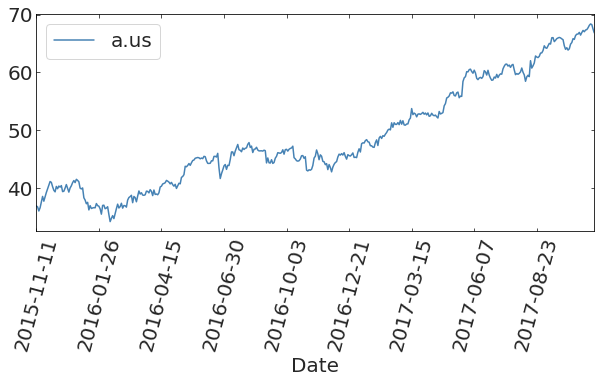

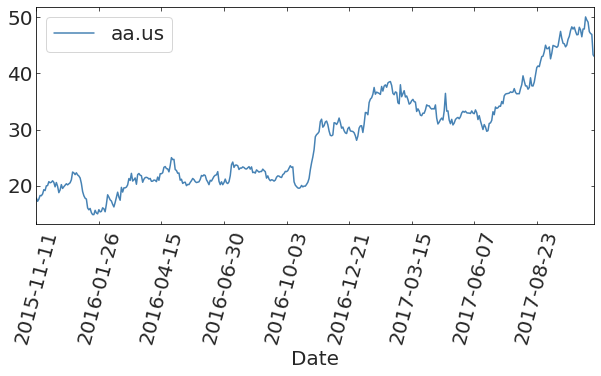

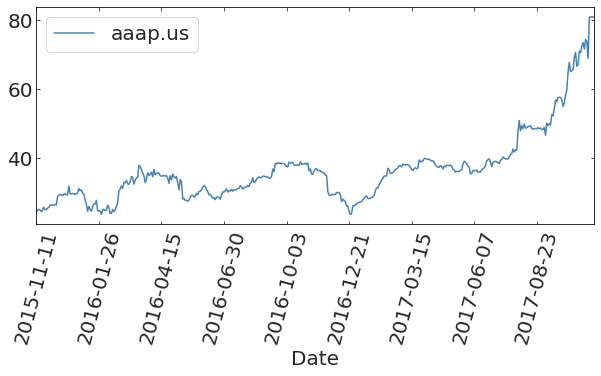

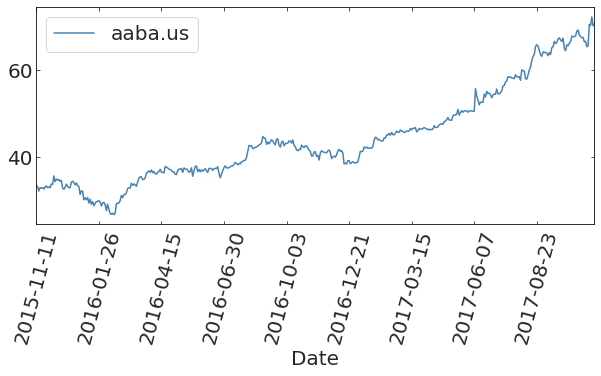

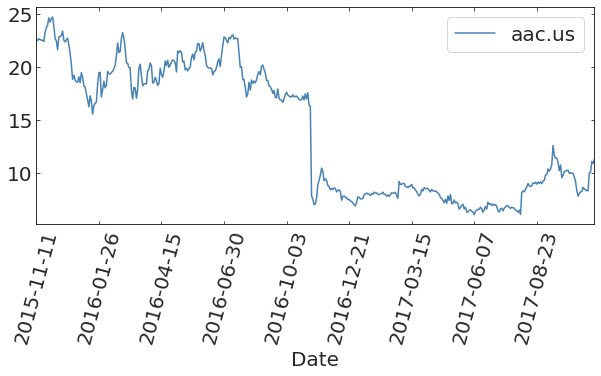

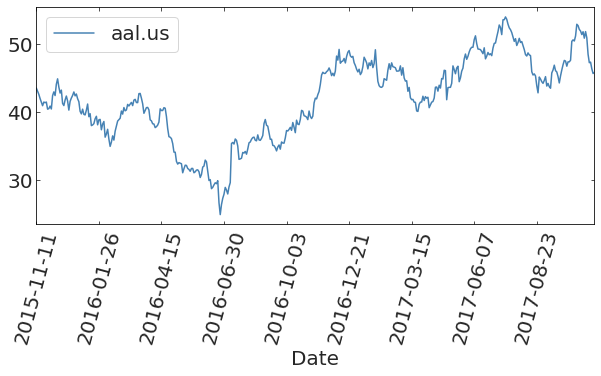

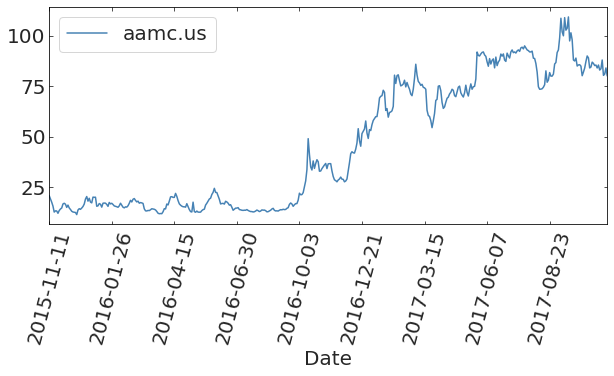

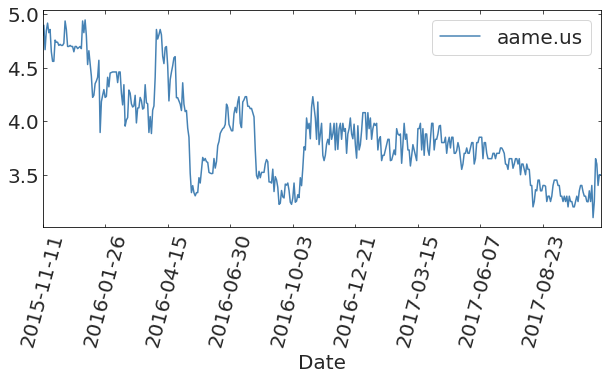

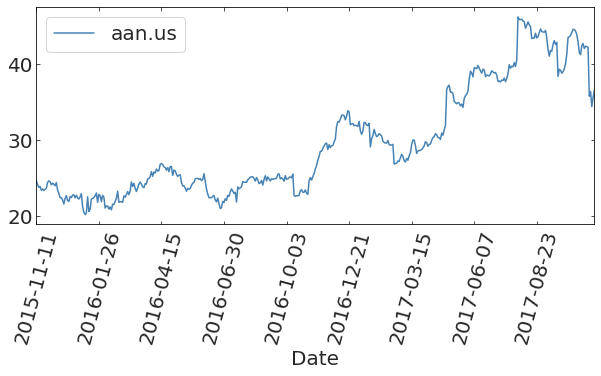

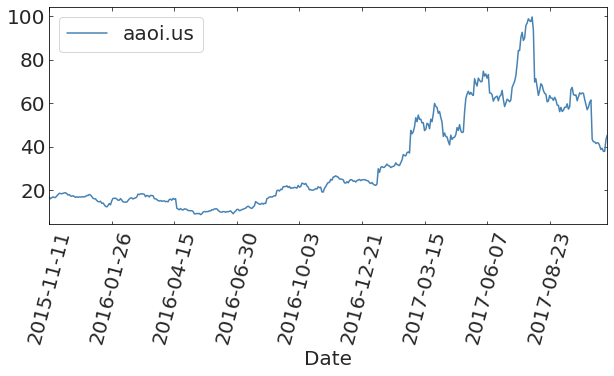

In [23]:
for c in tss.columns:
    fig, ax = pl.subplots(figsize=(10,4))
    tss.plot(y=c, ax=ax, rot=75)

tss.shape

In [0]:
tss.index = pd.to_datetime(tss.index)#[['aame.us']]

In [0]:
import statsmodels.api as sm
sm.tsa.SARIMAX?

In [26]:
# Step 1: construct an SARIMAX model for Atlantic American Corporation data
model = sm.tsa.SARIMAX(tss[['aame.us']], order=(1, 1, 1), trend='c')

# Step 2: fit the model's parameters by maximum likelihood
results = model.fit()



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                aame.us   No. Observations:                  447
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 301.057
Date:                Tue, 25 Feb 2020   AIC                           -594.115
Time:                        19:51:57   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                - 447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0739      0.043      1.737      0.082      -0.009       0.157
ar.L1          0.9812      0.010     94.552      0.000       0.961       1.002
ma.L1         -0.2708      0.040     -6.754      0.0

<Figure size 2160x2160 with 0 Axes>

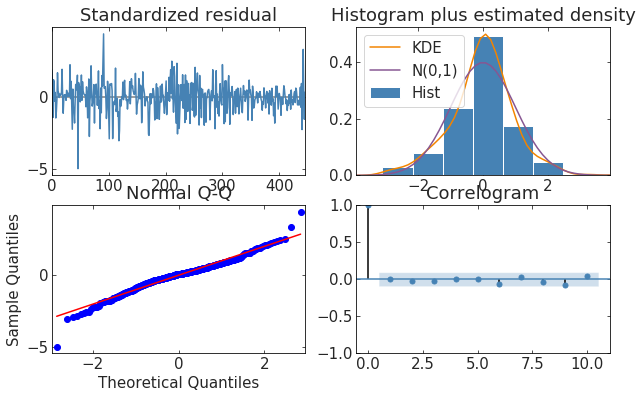

In [30]:


# Step 3: explore / use results

# - Print a table summarizing estimation results
print(results.summary())

# - Print only the estimated parameters
print(results.params)

# - Create diagnostic figures based on standardized residuals:
#   (1) time series graph
#   (2) histogram
#   (3) Q-Q plot
#   (4) correlogram
pl.figure(figsize=(30,30))
pl.rcParams['font.size'] = 15
results.plot_diagnostics();
